Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [24]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

import danych

In [25]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-25-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


**Poznaj dane:**

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [26]:
print(df.shape)
print(df.dtypes)

(100000, 28)
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score   

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [27]:
df = df.drop(['ID','Customer_ID','SSN','Name'], axis=1)


usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [28]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.replace('_', '')
    df[col] = df[col].str.replace('-', '')
    df[col] = df[col].replace('', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [29]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

if df['Month'].dtype == 'object':
  df['Month'] = df['Month'].map(month_mapping)
  df['Month'].fillna(0, inplace=True)
  df['Month'] = df['Month'].astype(int)
else:
  print("Month column is not of object type")
print(df['Month'].head())

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64


<ipython-input-29-3bb44f5f9700>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].fillna(0, inplace=True)


Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

Przelicz kolumne Credit_History_Age na liczbę mięsiecy


In [30]:
def convert_to_months(value):
    if pd.isna(value):
        return np.nan

    years, months = 0, 0
    parts = value.split(" and ")

    for part in parts:
        if "Year" in part:
            years = int(part.split()[0])
        elif "Month" in part:
            months = int(part.split()[0])

    return years * 12 + months


df['Credit_History_Months'] = df['Credit_History_Age'].apply(convert_to_months)

print(df['Credit_History_Months'].head())

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Months, dtype: float64


In [31]:

df['Type_of_Loan'] = df['Type_of_Loan'].fillna('')
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(r'\band\b', '', regex=True).str.strip() #removes "and"

# Split and clean the values
df_type_of_loan = df['Type_of_Loan'].str.split(r',\s*')  # Handles different spacing

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer()
dt = mlb.fit_transform(df_type_of_loan.to_list())  # Ensure correct format

# Convert to DataFrame
encoded_df = pd.DataFrame(data=dt, columns=mlb.classes_)

# Merge with original DataFrame and drop old column
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

   Month  Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0      1   23  Scientist      19114.12            1824.843333   
1      2   23  Scientist      19114.12                    NaN   
2      3  500  Scientist      19114.12                    NaN   
3      4   23  Scientist      19114.12                    NaN   
4      5   23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   
2                  3                4              3           4   
3                  3                4              3           4   
4                  3                4              3           4   

   Delay_from_due_date  ...    Auto Loan  CreditBuilder Loan  \
0                    3  ...  0         1                   1   
1                   -1  ...  0         1                   1   
2       

Zmien inne zmienne na numeryczne

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

print(df.head())


   Month  Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  295          12           4349            1824.843333   
1      2  295          12           4349                    NaN   
2      3  879          12           4349                    NaN   
3      4  295          12           4349                    NaN   
4      5  295          12           4349            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3          232   
1                  3                4              3          232   
2                  3                4              3          232   
3                  3                4              3          232   
4                  3                4              3          232   

   Delay_from_due_date  ...     Auto Loan  CreditBuilder Loan  \
0                    3  ...  0          1                   1   
1                   -1  ...  0          1           

Uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')


df[['Annual_Income']] = imputer.fit_transform(df[['Annual_Income']])
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())

df[['Monthly_Inhand_Salary']] = imputer.fit_transform(df[['Monthly_Inhand_Salary']])
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())


Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

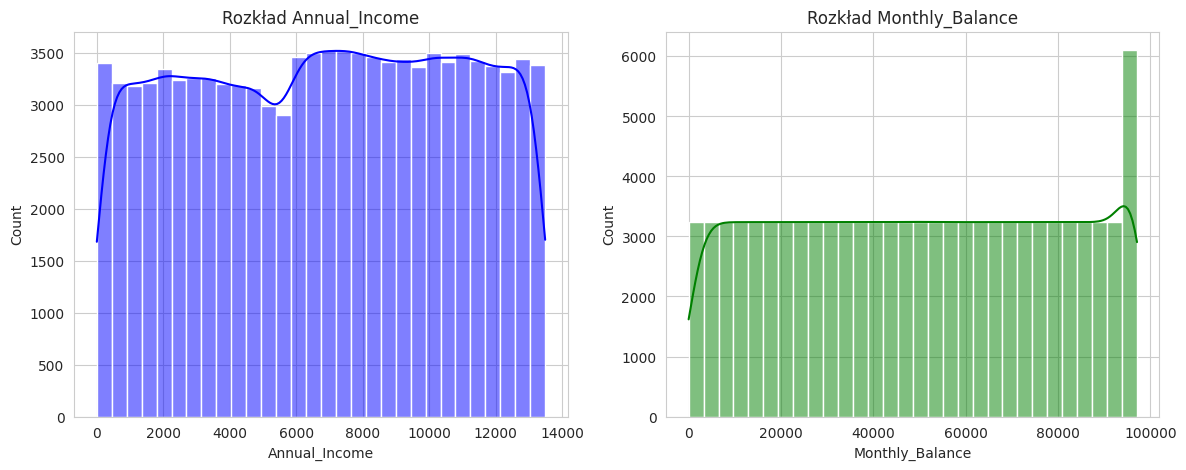

In [34]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.histplot(df['Annual_Income'], kde=True, bins=30, ax=axes[0], color='blue')
axes[0].set_title('Rozkład Annual_Income')

sns.histplot(df['Monthly_Balance'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_title('Rozkład Monthly_Balance')

plt.show()


usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

In [35]:

imputer = SimpleImputer(strategy='mean')
df[['Monthly_Inhand_Salary', 'Annual_Income']] = imputer.fit_transform(df[['Monthly_Inhand_Salary', 'Annual_Income']])


In [36]:
age_mean = df['Age'].mean()
df['Age'] = np.where((df['Age'] < 0) | (df['Age'] > 100), age_mean, df['Age'])

In [37]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

replace_outliers_with_median(df, 'Annual_Income')
replace_outliers_with_median(df, 'Monthly_Inhand_Salary')

In [43]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,,Auto Loan,CreditBuilder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1,1.0,12,0.322483,0.145768,3,4,3,232,0.111111,...,0,1,1,0,1,0,0,0,1,0
1,2,1.0,12,0.322483,0.372808,3,4,3,232,0.055556,...,0,1,1,0,1,0,0,0,1,0
2,3,1.0,12,0.322483,0.372808,3,4,3,232,0.111111,...,0,1,1,0,1,0,0,0,1,0
3,4,1.0,12,0.322483,0.372808,3,4,3,232,0.138889,...,0,1,1,0,1,0,0,0,1,0
4,5,1.0,12,0.322483,0.145768,3,4,3,232,0.152778,...,0,1,1,0,1,0,0,0,1,0


Zwizualizuj korelacje między zmiennymi

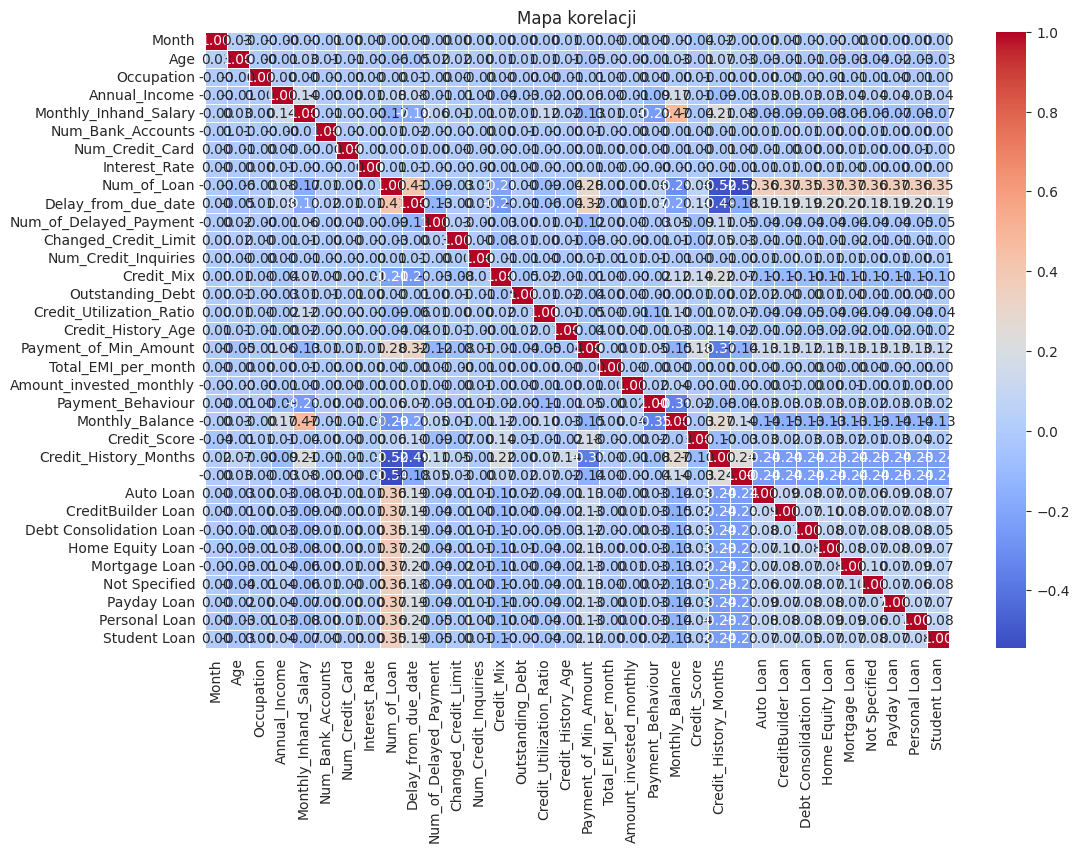


Kolumny o korelacji > 0.3:
                      Feature1                 Feature2  Correlation
157     Monthly_Inhand_Salary          Monthly_Balance     0.469626
281               Num_of_Loan      Delay_from_due_date     0.413924
295               Num_of_Loan    Credit_History_Months     0.516396
296               Num_of_Loan                              0.543973
297               Num_of_Loan                Auto Loan     0.358185
298               Num_of_Loan       CreditBuilder Loan     0.365903
299               Num_of_Loan  Debt Consolidation Loan     0.354185
300               Num_of_Loan         Home Equity Loan     0.366699
301               Num_of_Loan            Mortgage Loan     0.365445
302               Num_of_Loan            Not Specified     0.356890
303               Num_of_Loan              Payday Loan     0.366462
304               Num_of_Loan            Personal Loan     0.355833
305               Num_of_Loan             Student Loan     0.349002
314       Delay_fro

In [38]:
corr_matrix = df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa korelacji")
plt.show()


correlated_features = corr_matrix.abs().unstack().reset_index()
correlated_features.columns = ['Feature1', 'Feature2', 'Correlation']
correlated_features = correlated_features[(correlated_features['Correlation'] > 0.3) & (correlated_features['Feature1'] != correlated_features['Feature2'])]
print("\nKolumny o korelacji > 0.3:\n", correlated_features)


Skalowanie

In [40]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                    'Delay_from_due_date', 'Num_of_Delayed_Payment',
                    'Outstanding_Debt', 'Credit_History_Age',
                    'Total_EMI_per_month', 'Monthly_Balance']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


Model

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
principal_components = pca.fit_transform(df[columns_to_scale])

pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

print("\nWyjaśniona wariancja PCA:", pca.explained_variance_ratio_)
print("\nŁączna wyjaśniona wariancja:", sum(pca.explained_variance_ratio_))

df_pca = pd.concat([df, pca_df], axis=1)


Wyjaśniona wariancja PCA: [0.22637296 0.19404526 0.15551845 0.14304539 0.13061928 0.06262698]

Łączna wyjaśniona wariancja: 0.9122283255947621
